In [ ]:
"""
This notebook generates plots in Fig. 1 of the paper. For example track plots, please see the example tracks directory.
"""

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [29]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "evaluation_data.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -cvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/evaluation_data.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/evaluation_data.tar.gz


In [68]:
# LOAD DATA

# Negative and positive bounds for model performance on correlation
mean_predictor_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/pos_neg_bounds/mean_predictor_corrs.csv.gz"), index_col=0
)
replicate_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/pos_neg_bounds/replicate_pearsons.csv.gz"), index_col=0
)

# Load model predictions
pearson = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/predictions/ensemble_test/ensemble_fold_0_pearson.csv.gz"), index_col=0
)
sums = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/predictions/ensemble_test/ensemble_fold_0_quantity.csv.gz"), index_col=0
)
log_sums = np.log10(sums + 1e-1)
tss = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/predictions/ensemble_test/ensemble_fold_0_tss.csv.gz"), index_col=0
)
directionality = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/predictions/ensemble_test/ensemble_fold_0_directionality.csv.gz"), index_col=0
) + 1e-1
expt_directionality = np.log10(directionality.expt_pl / directionality.expt_mn)
pred_directionality = np.log10(directionality.pred_pl / directionality.pred_mn)

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

0.21288294055949813 0.7596355325444674 0.9240692449850152


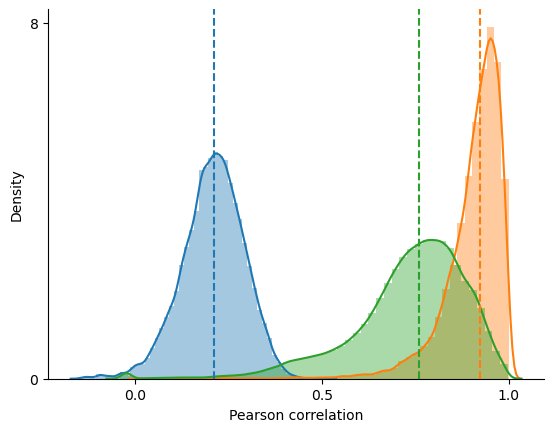

In [36]:
# Plot pdf of predicted vs observed pearson correlations

fig, d = plt.subplots()
sns.distplot(mean_predictor_corr.mean(axis=0))
sns.distplot(replicate_corr.values.reshape(-1))
sns.distplot(pearson.values.reshape(-1))
plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[1], linestyle="--")
plt.axvline(np.nanmedian(pearson), 0, 1, color=colors[2], linestyle="--")
d.set_yticks([0, 8])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("img/ensemble_predictions_pearson.pdf")

print(np.nanmedian(mean_predictor_corr), np.nanmedian(pearson), np.nanmedian(replicate_corr))

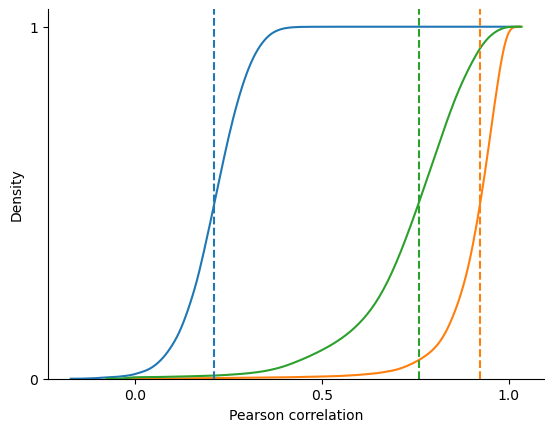

In [37]:
# Plot cdfs of pearson correlations (not used in paper, but year for completion's sake)

fig, d = plt.subplots()
sns.kdeplot(list(mean_predictor_corr.mean(axis=0)) + [1], cumulative=True)
sns.kdeplot(replicate_corr.values.reshape(-1), cumulative=True)
sns.kdeplot(pearson.values.reshape(-1), cumulative=True)
plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[1], linestyle="--")
plt.axvline(np.nanmedian(pearson), 0, 1, color=colors[2], linestyle="--")
d.set_yticks([0, 1])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("img/ensemble_predictions_pearson_cdf.pdf")

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


PearsonRResult(statistic=0.6333906098364355, pvalue=0.0)

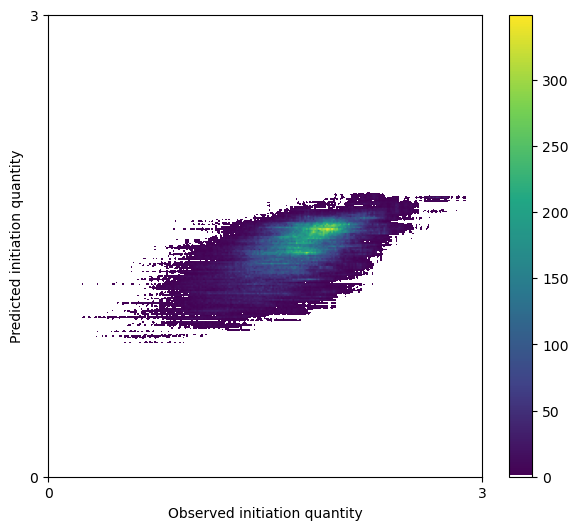

In [76]:
# Plot predicted vs observed log quantities

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = ax.scatter_density(log_sums.expt, log_sums.pred, cmap=white_viridis)
fig.colorbar(density)
ax.set_xlim(-0, 3)
ax.set_ylim(-0, 3)
ax.set_yticks([-0, 3])
#ax.set_yticklabels(["", ""])
ax.set_xticks([-0, 3])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Predicted initiation quantity")
ax.set_xlabel("Observed initiation quantity")
plt.savefig("img/ensemble_predictions_log_sums.pdf")

pearsonr(log_sums["pred"], log_sums["expt"])

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


PearsonRResult(statistic=0.808014593231587, pvalue=0.0)

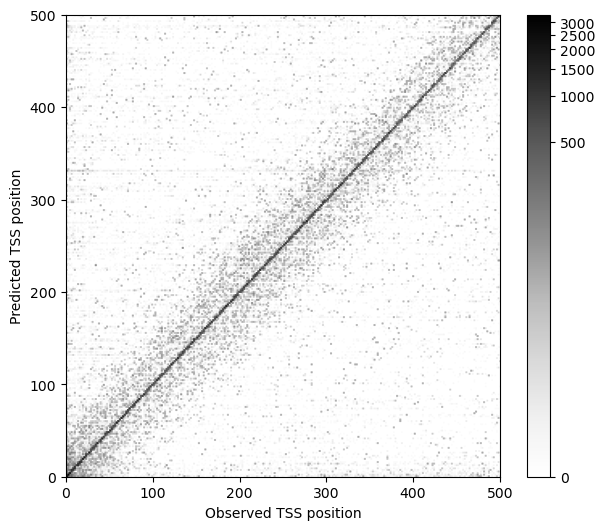

In [78]:
# Plot predicted vs observed TSS position (colored by log density)

norm = ImageNormalize(stretch=LogStretch())

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
log_density = ax.scatter_density(
    pd.concat([tss["expt_tss_pl"], tss["expt_tss_mn"]]),
    pd.concat([tss["pred_tss_pl"], tss["pred_tss_mn"]]),
    cmap="Greys",
    norm=norm,
)
fig.colorbar(log_density)
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.set_ylabel("Predicted TSS position")
ax.set_xlabel("Observed TSS position")
plt.savefig("img/ensemble_tss_pred_vs_obs.pdf")

pearsonr(
    pd.concat([tss["expt_tss_pl"], tss["expt_tss_mn"]]),
    pd.concat([tss["pred_tss_pl"], tss["pred_tss_mn"]])
)

In [29]:
pred_dir = np.log10(directionality.pred_pl + 1e-3) - np.log10(directionality.pred_mn + 1e-3)
expt_dir = np.log10(directionality.expt_pl + 1e-3) - np.log10(directionality.expt_mn + 1e-3)

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


PearsonRResult(statistic=0.8266642638480366, pvalue=0.0)

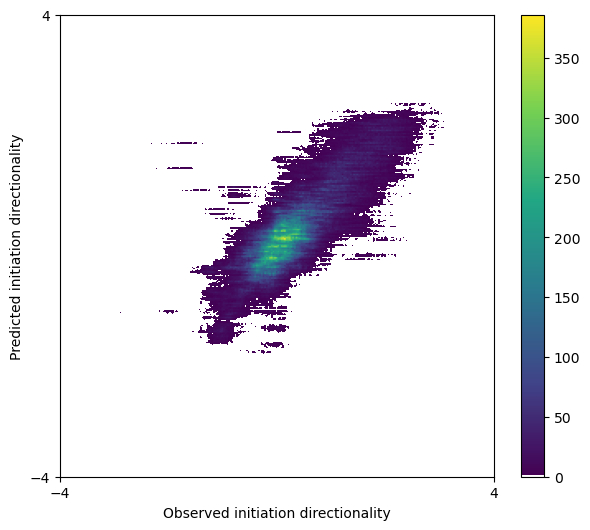

In [79]:
# Plot predicted vs observed directionality (log(pl/mn)). Not used in paper, but here for completion

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = ax.scatter_density(expt_directionality, pred_directionality, cmap=white_viridis)
fig.colorbar(density)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_yticks([-4, 4])
#ax.set_yticklabels(["", ""])
ax.set_xticks([-4, 4])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Predicted initiation directionality")
ax.set_xlabel("Observed initiation directionality")
plt.savefig("img/ensemble_predictions_directionality.pdf")

pearsonr(expt_directionality, pred_directionality)

PearsonRResult(statistic=0.8266642638480366, pvalue=0.0)